In [1]:
import bento
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
adata = bento.datasets.load_dataset("merfish_processed")

  0%|          | 0.00/476M [00:00<?, ?B/s]

In [49]:
pattern_df = []
for p in bento._constants.PATTERN_NAMES:
    pdf = adata.to_df(p).reset_index().melt(id_vars='cell').groupby("gene").sum()
    pdf['pattern'] = p
    pattern_df.append(pdf)

pattern_df = pd.concat(pattern_df)

In [50]:
pattern_df

,value,pattern
gene,,
AFAP1,133.0,cell_edge
AFF4,117.0,cell_edge
AGAP1,134.0,cell_edge
AGO3,26.0,cell_edge
AGPS,233.0,cell_edge
...,...,...
notarget001,22.0,nuclear_edge
notarget002,102.0,nuclear_edge
notarget003,117.0,nuclear_edge


In [55]:
top_genes = pattern_df.groupby('pattern').apply(
    lambda col: pd.Series(col.sort_values('value', ascending=False).head(3).index.tolist())
).T
top_genes

pattern,cell_edge,cytoplasmic,none,nuclear,nuclear_edge
0,TLN1,SPTBN1,ANKRD52,MALAT1,FBN1
1,PRPF8,DYNC1H1,CEP250,SLC5A3,FBN2
2,RAB3B,ZNF592,HERC2,SOD2,COL5A1


In [56]:
adata.uns["points"]["top"] = None

for p in bento._constants.PATTERN_NAMES:
    is_top = adata.uns["points"]["gene"].isin(top_genes[p])
    adata.uns["points"]["top"][is_top] = p

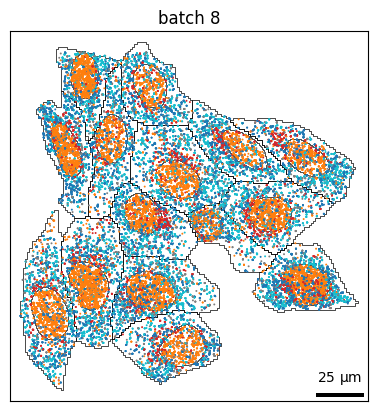

In [68]:
bento.pl.points(
    adata[:, top_genes.values.flatten()],
    batch="8",
    hue="top",
    palette=dict(zip(bento._constants.PATTERN_NAMES, bento._constants.PATTERN_COLORS)),
    legend=False,
)